# Logistic Regression

sigmoid = 1 / 1 + exp(-z)

Prob(Y=1|X) = sigmoid(z)

log-loss / cross-entropy loss

loss(W) = -1/m sum(y ln Prob + (1 - y) ln (1 - Prob))

In [16]:
import numpy as np 

class LogisticRegression:
    def __init__(self, lr = 0.01, max_epoch = 1000, tol = 1e-4):
        self.lr = lr
        self.max_epoch = max_epoch
        self.tol = tol
        self.w = None
        self.b = None
        
    def _init_weights(self, feature_num):
        self.w = np.random.rand(feature_num)
        self.b = np.random.rand(1)
        
    def _loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    def _weights_update(self, X, y, y_pred):
        sample_num = X.shape[0]
        dw = np.dot(X.T, y_pred - y) / sample_num
        db = np.mean(y_pred - y)
        self.w -= self.lr * dw
        self.b -= self.lr * db
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def fit(self, X, y):
        sample_num, feature_num = X.shape
        self._init_weights(feature_num)
        for i in range(self.max_epoch):
            y_pred = self.predict(X)
            loss = self._loss(y, y_pred)
            if loss < self.tol:
                break
            self._weights_update(X, y, y_pred)
        return
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = self._sigmoid(z)
        return y_pred

## Test

In [17]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[0.95002217 0.97335034]


# Follow Up

a. regularization:   

Regularization can help prevent overfitting and improve the generalization performance of the model. You could add L1 or L2 regularization to the cost function and adjust the regularization strength with a hyperparameter. Here's an example of how to add L2 regularization to the code;


b. sophisticated optimization algorithm:   

Gradient descent is a simple and effective optimization algorithm, but it may not be the most efficient or accurate for large or complex datasets. You could try using a more sophisticated algorithm, such as stochastic gradient descent (SGD), mini-batch SGD, or Adam, which can converge faster and find better optima. Here's an example of how to use mini-batch SGD.

In [34]:
import numpy as np

class CustomLogisticRegression(LogisticRegression):
    def __init__(self, lr=0.01, max_epoch=1000, tol = 1e-4, regularization='l2', reg_strength=0.1, batch_size=32):
        super().__init__(lr, max_epoch, tol)
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.w = None
        self.b = None
        
    def _loss(self, y, y_pred):
        sample_num = y.shape[0]
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        if self.regularization == 'l1':
            loss += self.reg_strength * np.sum(np.abs(self.w))
        elif self.regularization == 'l2':
            loss += self.reg_strength * np.sum(self.w ** 2)
        return loss
    
    def _weights_update(self, X, y, y_pred):
        sample_num = X.shape[0]
        dw = np.dot(X.T, (y_pred - y)) / sample_num
        db = np.mean(y_pred - y)
        if self.regularization == 'l1':
            dw += self.reg_strength * np.sign(self.w)
        elif self.regularization == 'l2':
            dw += self.reg_strength * 2 * self.w
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        sample_num, feature_num = X.shape
        self._init_weights(feature_num)
        
        batch_num = sample_num // self.batch_size
        for i in range(self.max_epoch):
            for j in range(batch_num):
                batch_indices = np.random.choice(sample_num, batch_num, replace=False)
                X_batch, y_batch = X[batch_indices], y[batch_indices]
                y_pred_batch = self.predict(X_batch)
                loss = self._loss(y_batch, y_pred_batch)
                if loss < self.tol:
                    break
                self._weights_update(X_batch, y_batch, y_pred_batch)
        return

Regularization: You can choose between L1 or L2 regularization by setting the regularization parameter to either 'l1' or 'l2', and adjust the regularization strength with the reg_strength parameter.

Mini-batch stochastic gradient descent: The model uses mini-batch SGD (instead of simple gradient descent) to update the weights and bias, which can converge faster and find better optima.

In [35]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = CustomLogisticRegression(lr=0.01, max_epoch=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[0.96960211 0.98596092]


It is difficult to visualize logistic regression since it is a high-dimensional problem. However, we can visualize the decision boundary of a logistic regression model for a two-dimensional dataset.

Here's an example of how to visualize the decision boundary of the LogisticRegression class on a 2D dataset using the matplotlib library:

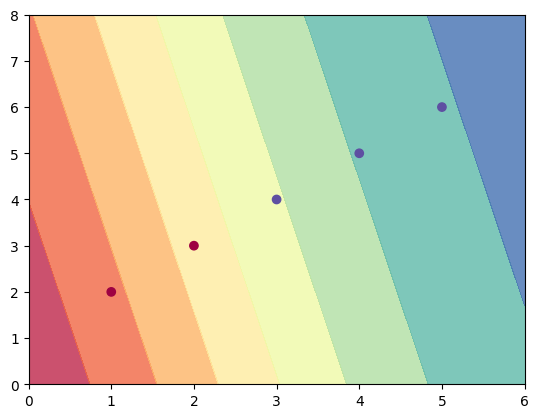

In [37]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = CustomLogisticRegression(lr=0.01, max_epoch=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()

# Multi-Dimension Logistic Regression

F(X) = X W

H(X) = sigmoid(F(X))

Cost = - 1/n sum(Y log(H(X)) + (1 - Y) log (1 - H(X)))

In [38]:
import numpy as np
import random

n, k, p=100, 8, 3 
X=np.random.random([n,k])
W=np.random.random([k,p])
y=np.random.randint(p, size=(1,n))
Y=np.zeros((n,p))
Y[np.arange(n), y]=1

max_itr=5000
alpha=0.01
Lambda=0.01

Gradient:   
X.T (H(X) - Y) + 2 lambda W

In [44]:
# F(x)= w[0]*x + w[1]
def F(X, W):
    return np.matmul(X,W)

def H(F):
    return 1/(1+np.exp(-F))

def cost(Y_est, Y):
    E= - (1/n) * (np.sum(Y*np.log(Y_est) + (1-Y)*np.log(1-Y_est)))  + np.linalg.norm(W,2)
    return E, np.sum(np.argmax(Y_est,1)==y)/n

def gradient(Y_est, Y, X):
    return (1/n) * np.matmul(X.T, (Y_est - Y) ) + Lambda* 2* W

In [45]:
def fit(W, X, Y, alpha, max_itr):
    for i in range(max_itr):
        
        F_x=F(X,W)
        Y_est=H(F_x)
        E, c= cost(Y_est, Y)
        Wg=gradient(Y_est, Y, X)
        W=W - alpha * Wg
        if i%1000==0:
            print(E, c)
        
    return W, Y_est

In [46]:
X=np.concatenate( (X, np.ones((n,1))), axis=1 ) 
W=np.concatenate( (W, np.random.random((1,p)) ), axis=0 )

W, Y_est = fit(W, X, Y, alpha, max_itr)

4.092899559385625 0.45
3.945607363106942 0.52
3.9447706083599234 0.5
3.9445279912579565 0.53
3.9445998856334037 0.53
